手寫辨認(Dense NN, CNN= tf.keras)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


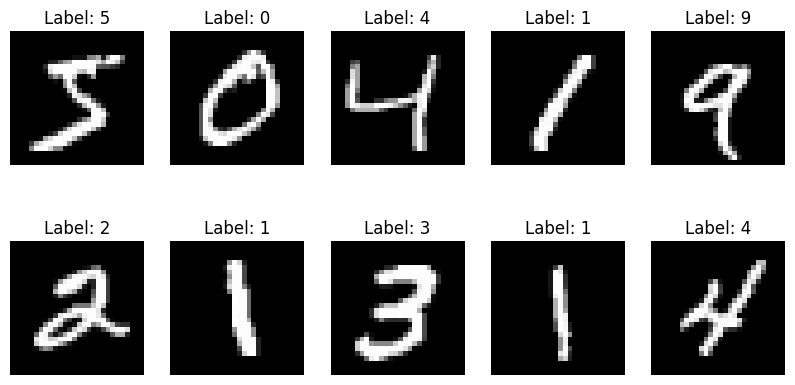

Training Dense Neural Network


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7777 - loss: 0.7492 - val_accuracy: 0.9475 - val_loss: 0.1813
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9461 - loss: 0.1928 - val_accuracy: 0.9615 - val_loss: 0.1284
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9596 - loss: 0.1415 - val_accuracy: 0.9661 - val_loss: 0.1117
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9649 - loss: 0.1166 - val_accuracy: 0.9697 - val_loss: 0.1018
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9706 - loss: 0.0949 - val_accuracy: 0.9720 - val_loss: 0.0920
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9739 - loss: 0.0813 - val_accuracy: 0.9724 - val_loss: 0.0920
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0688 - val_accuracy: 0.9732 - val_loss: 0.0840
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0599 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8121 - loss: 0.6110 - val_accuracy: 0.9752 - val_loss: 0.0833
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9731 - loss: 0.0876 - val_accuracy: 0.9841 - val_loss: 0.0570
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9814 - loss: 0.0588 - val_accuracy: 0.9866 - val_loss: 0.0464
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0456 - val_accuracy: 0.9896 - val_loss: 0.0390
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0349 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0318 - val_accuracy: 0.9904 - val_loss: 0.0330
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9905 - val_loss: 0.0367
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9920 - loss: 0.0236 - val_accuracy: 0.

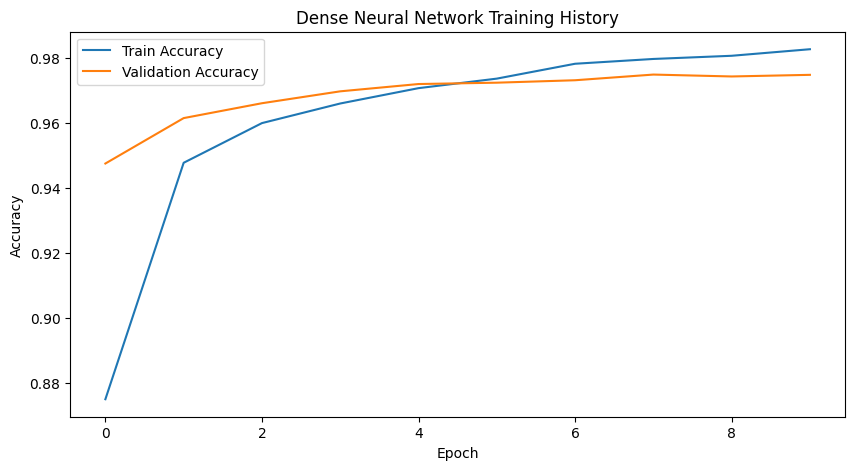

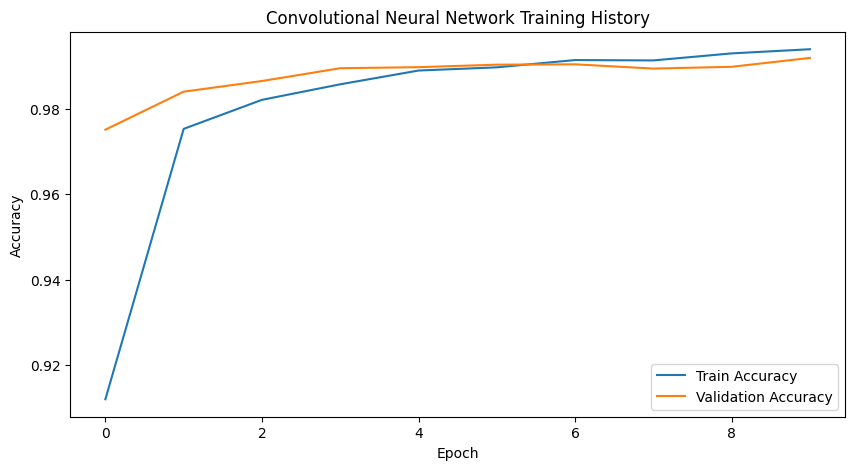

Models saved successfully.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data Understanding: Visualize some examples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Preprocessing data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build Dense Neural Network model
def build_dense_nn():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build Convolutional Neural Network model
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate Dense NN
print("Training Dense Neural Network")
dense_model = build_dense_nn()
dense_history = dense_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
dense_test_loss, dense_test_acc = dense_model.evaluate(x_test, y_test)
print(f"Dense NN Test Accuracy: {dense_test_acc:.4f}")

# Train and evaluate CNN
print("\nTraining Convolutional Neural Network")
cnn_model = build_cnn()
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

# Visualization of training history
def plot_history(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(dense_history, "Dense Neural Network Training History")
plot_history(cnn_history, "Convolutional Neural Network Training History")

# Save models for deployment
dense_model.save("dense_nn_model.h5")
cnn_model.save("cnn_model.h5")
print("Models saved successfully.")
